In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
import io

#https://www.geeksforgeeks.org/principal-component-analysis-with-python/

In [2]:
#import BRCA dataset from Kaggle
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

dataset2 =  pd.read_csv(io.StringIO(download.decode('utf-8')))
#print (dataset1.head())

dataset = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = dataset.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

dataset = dataset.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in dataset.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            dataset.at[index, string_column] = value_map[row[string_column]]
       
print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)



['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']
    PR.Status ER.Status HER2.Final.Status histological.type
0           1         1                 2                 3
1           1         2                 2                 3
2           1         1                 2                 3
3           1         1                 2                 3
4           1         1                 2                 3
..        ...       ...               ...               ...
700         0         0                 0                 4
701         0         0                 0                 4
702         0         0                 0                 4
703         0         0                 0                 4
704         0         0                 0                 4

[705 rows x 4 columns]


0      3
1      3
2      3
3      3
4      3
      ..
700    4
701    4
702    4
703    4
704    4
Name: histological.type, Length: 705, dtype: int64
[0.08144044 0.06107846]
Explained variation per principal component: [0.08144044 0.06107846]
0    1.0
1    0.0
Name: PC1, dtype: float64


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

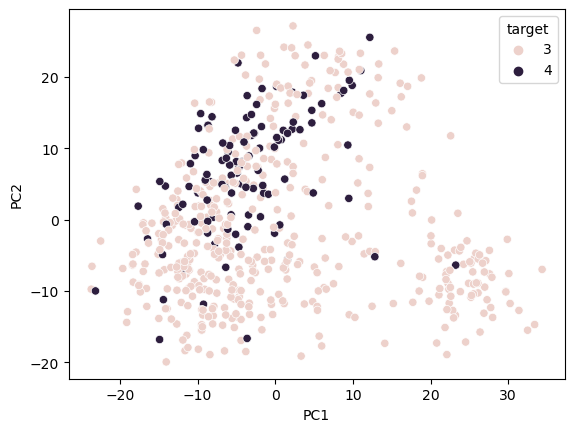

In [11]:
#importg new dataset
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/modified_brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

modified_dataset2 =  pd.read_csv(io.StringIO(download.decode('utf-8')))

modified_dataset = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')

string_columns = modified_dataset.select_dtypes(include=['object']).columns.tolist()
#print(string_columns)
#print(modified_dataset['PR.Status'][700])
print(modified_dataset.iloc[:, -1])

#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 0:1940].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


import seaborn as sns

# Create a new dataframe with the first two principal components
pca_df = pd.DataFrame(X_train[:, :2], columns=['PC1', 'PC2'])

# Add the target variable to the dataframe
pca_df['target'] = y_train
#pca_df['mutation_subtype'] = modified_dataset2['mutation_subtype']

# Create a scatter plot with the first two principal components
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target')
#sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='mutation_subtype')

In [9]:
X_train_pca = pca.fit_transform(X_train)

# get feature names
feature_names = modified_dataset2.columns[:1940]

# get loadings matrix
loadings = pca.components_.T

# create dataframe to display loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=feature_names)

# display top 10 features contributing to each principal component
for i in range(pca.n_components_):
    print(f"Top 10 features contributing to principal component {i+1}:")
    print(loadings_df.iloc[:, i].nlargest(10))
    print()

ValueError: Shape of passed values is (2, 2), indices imply (1940, 2)

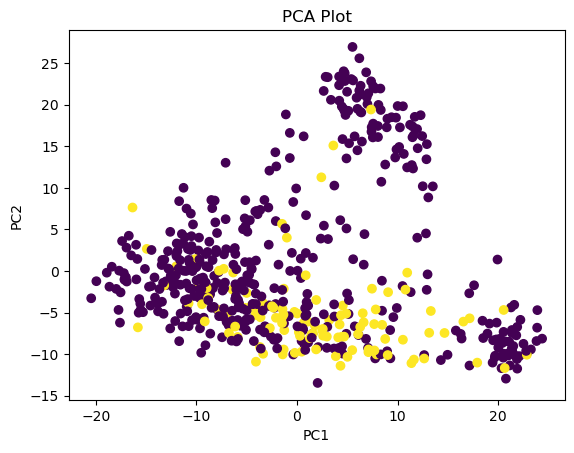

In [30]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

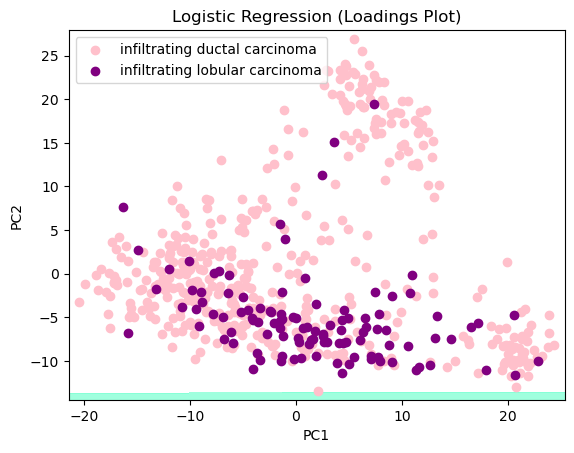

In [31]:
# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

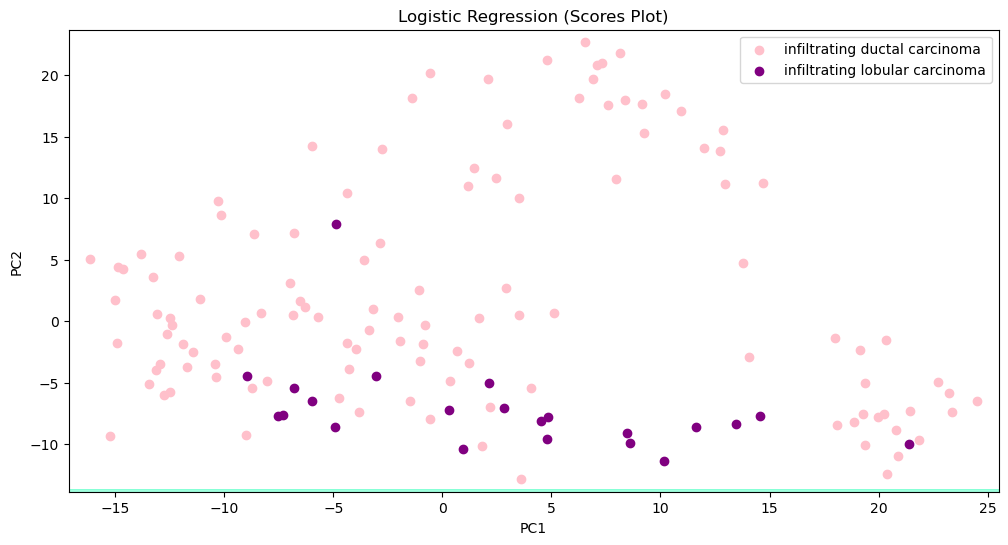

In [62]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X_test, y_test
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])
  
# title for scatter plot
plt.title('Logistic Regression (Scores Plot)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
  
# show scatter plot
plt.show()



In [ ]:
#trying different visualization method
import numpy as np

#modified = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')
#modified.shape
#features = modified.columns.tolist()
#labels = modified.index.tolist()



#features_labels = np.append(features, 'label')

In [ ]:
x = modified_dataset2.iloc[:, 0:1940].values
x = StandardScaler().fit_transform(x)
x.shape

In [ ]:
np.mean(x), np.std(x)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()


In [ ]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()


In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))
print("PC1 holds 8.1% of the information while PC2 holds 6.1%")

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [3, 4]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = modified_dataset2['histological.type'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


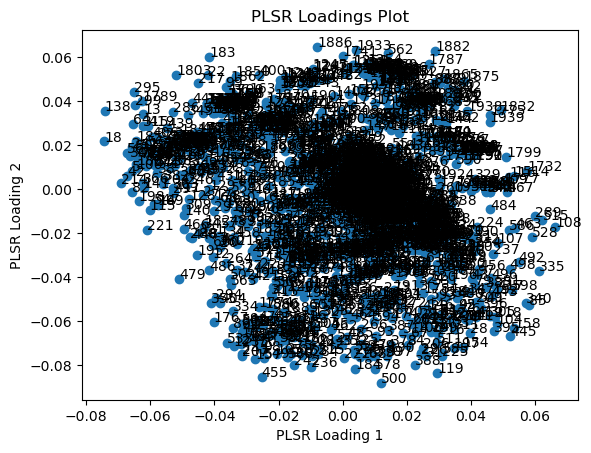

In [15]:
#PLSR Maybe
X = modified_dataset2.iloc[:, 0:1940].values
y = modified_dataset2.iloc[:, 1935:1935].values  # Select last 5 columns as target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)


# Get the loadings matrix
loadings = pls.x_loadings_


# Create a scatter plot
plt.scatter(loadings[:,0], loadings[:,1])

# Add labels to each point
for i in range(loadings.shape[0]):
    plt.annotate(str(i+1), (loadings[i,0], loadings[i,1]))

# Add axis labels and title
plt.xlabel('PLSR Loading 1')
plt.ylabel('PLSR Loading 2')
plt.title('PLSR Loadings Plot')

# Show the plot
plt.show()

[0.1850374  0.13894949 0.05724496 0.03911386 0.02210856 0.02144034
 0.01708571 0.01611611 0.01316175 0.01295824 0.01178052 0.01116175
 0.00968239 0.0093116  0.00876575 0.00787441 0.00752902 0.00682846
 0.00638754 0.00623939 0.00592332 0.00570558 0.00555985 0.00538568
 0.00512991 0.00496239 0.00488667 0.00470009 0.00457311 0.00447616
 0.00437929 0.00424366 0.00417981 0.00400707 0.00385468 0.00371578
 0.0036911  0.00360363 0.00352471 0.00345959 0.00336077 0.00334364
 0.00326699 0.00321816 0.00313154 0.00308489 0.00299369 0.0029799
 0.00296279 0.0029034  0.00282804 0.00279062 0.0027799  0.00273994
 0.00268088 0.00267003 0.00261736 0.0026035  0.00255548 0.00252803
 0.00248531 0.00246146 0.00240648 0.00239328 0.00237828 0.00234325
 0.00232318 0.00228562 0.00227764 0.00223699 0.00218879 0.00216765
 0.00215218 0.00212973 0.00207768 0.00206975 0.00203185 0.00200549
 0.00197216 0.0019561  0.00194846 0.00192506 0.00190479 0.0018705
 0.00186192 0.00184409 0.00183739 0.00180951 0.001775   0.001765

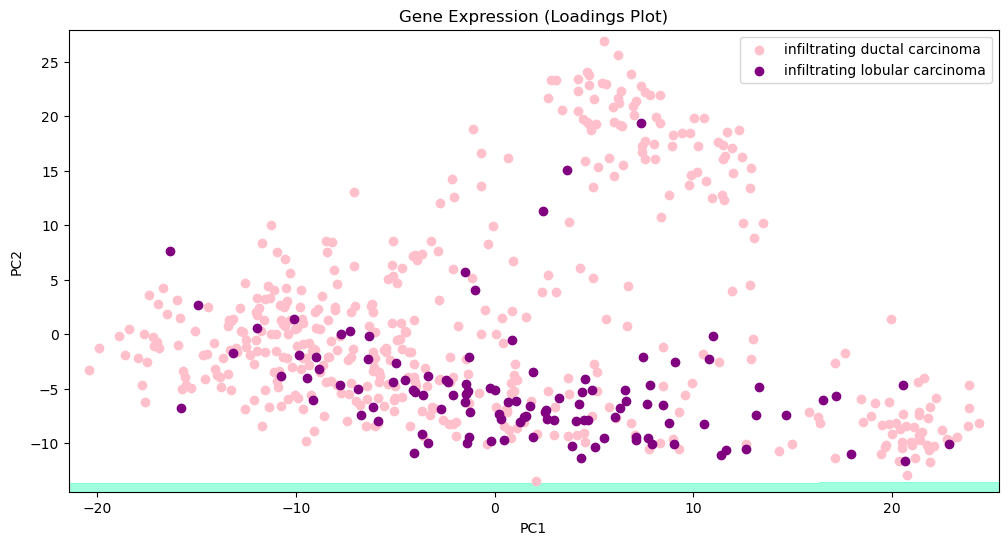

In [61]:
#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 0:604].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 0.95)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Gene Expression (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

[0.09565027 0.06622572]
Explained variation per principal component: [0.09565027 0.06622572]
0    1.0
1    0.0
Name: PC1, dtype: float64


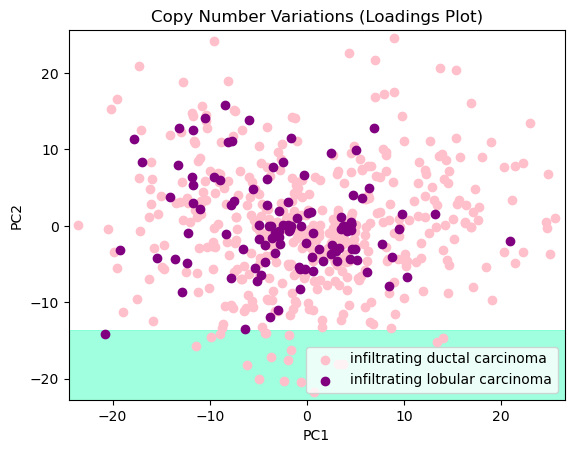

In [34]:
#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 604:1464].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Copy Number Variations (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

[0.06992702 0.0224672 ]
Explained variation per principal component: [0.06992702 0.0224672 ]
0    1.0
1    0.0
Name: PC1, dtype: float64


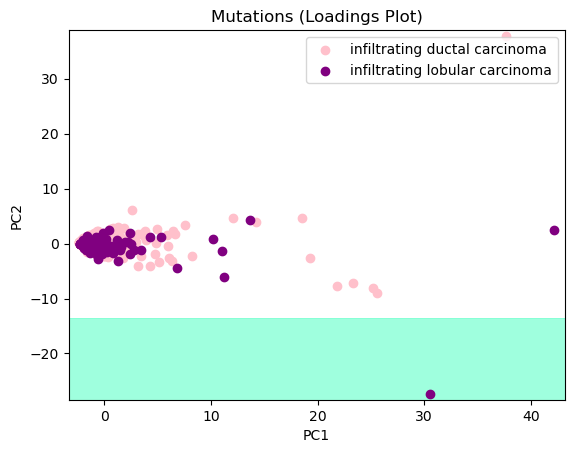

In [35]:
#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 1464:1713].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Mutations (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

[0.16305278 0.08519016]
Explained variation per principal component: [0.16305278 0.08519016]
0    1.0
1    0.0
Name: PC1, dtype: float64


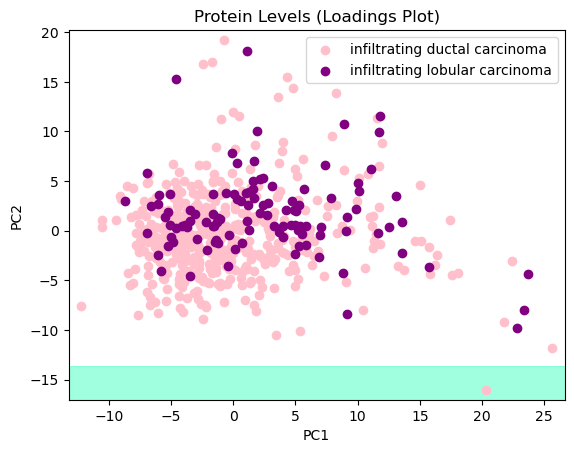

In [36]:
#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 1713:1936].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Protein Levels (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

[0.52049952 0.25201867]
Explained variation per principal component: [0.52049952 0.25201867]
0    1.0
1    0.0
Name: PC1, dtype: float64


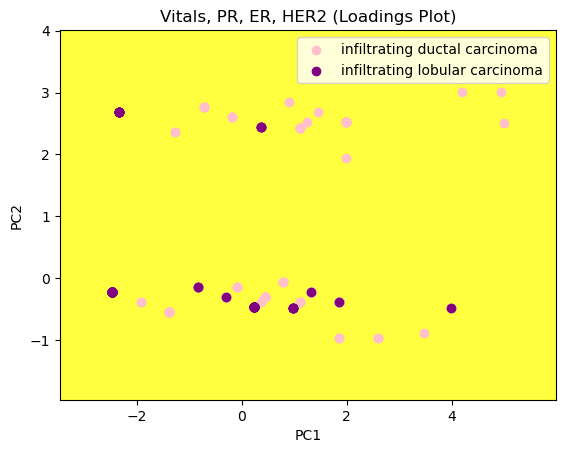

In [37]:
#distribute data into two components X and Y
X = modified_dataset2.iloc[:, 1936:1940].values
y = modified_dataset2.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

X_train_df = pd.DataFrame(X_train)

# Fit PCA to the training set
pca = PCA(n_components=2)
pca.fit(X_train_df)

# Get the loadings for the first two principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train_df.columns)

# Print the top 5 variables with the highest loading for PC1
print(loadings['PC1'].sort_values(ascending=False)[:5])


# Predicting the training set result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

# Create a ListedColormap for the scatter plot
cmap_scatter = ListedColormap(('pink', 'purple', 'turquoise'))

# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = cmap_scatter(i), label = ['infiltrating ductal carcinoma', 'infiltrating lobular carcinoma'][i])

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Vitals, PR, ER, HER2 (Loadings Plot)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

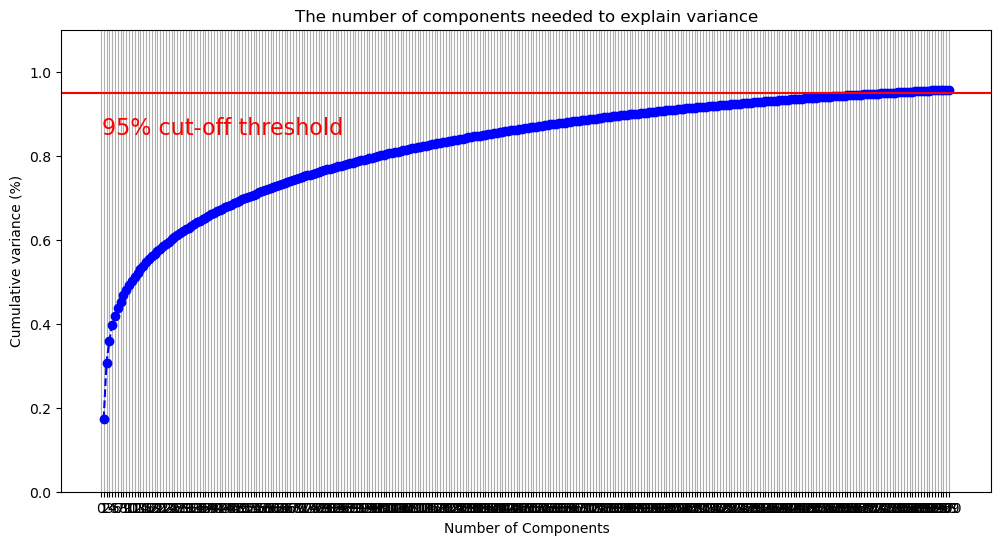

In [58]:
pca = PCA().fit(modified_dataset2)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,301)
y = np.cumsum(pca.explained_variance_ratio_)[:300]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 301, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


